<a href="https://colab.research.google.com/github/ReemFarah/ReemFarah.github.io/blob/main/CC5_Scraper_Implement_a_data_scraper_of_your_own.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
# URL of the page containing the table
url = "https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population"

# Scrape all tables on the page
tables = pd.read_html(url)

# Select the first table (inspect the data to confirm)
population_table = tables[0]

# Display the first few rows
print(population_table.head())

  Unnamed: 0       Location  Population % of world         Date  \
0          –          World  8119000000       100%   1 Jul 2024   
1    1/2 [b]          China  1409670000      17.3%  31 Dec 2023   
2    1/2 [b]          India  1402737000      17.2%   1 Jul 2024   
3          3  United States   340110988       4.2%   1 Jul 2024   
4          4      Indonesia   282477584       3.5%  30 Jun 2024   

  Source (official or from the United Nations) Notes  
0                          UN projection[1][3]   NaN  
1                         Official estimate[5]   [c]  
2                       Official projection[6]   [d]  
3                         Official estimate[7]   [e]  
4                National annual projection[8]   NaN  


In [3]:
# Print the column names and the number of columns
print(population_table.columns)
print(len(population_table.columns))

Index(['Unnamed: 0', 'Location', 'Population', '% of world', 'Date',
       'Source (official or from the United Nations)', 'Notes'],
      dtype='object')
7


In [4]:
population_table.columns = ['Rank', 'Country', 'Population', 'Percentage', 'Date', 'Source', 'ExtraColumn']


In [5]:
# Drop unnecessary columns
population_table = population_table[['Country', 'Population']]


In [7]:
# Ensure the column is a string before replacing commas
population_table['Population'] = population_table['Population'].astype(str).str.replace(',', '')

# Convert to integer after removing commas
population_table['Population'] = population_table['Population'].astype(int)

# Verify the cleaned column
print(population_table['Population'].head())


0    8119000000
1    1409670000
2    1402737000
3     340110988
4     282477584
Name: Population, dtype: int64


<ipython-input-7-c6367a1491e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_table['Population'] = population_table['Population'].astype(str).str.replace(',', '')
<ipython-input-7-c6367a1491e1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_table['Population'] = population_table['Population'].astype(int)


In [8]:
population_table.to_csv('cleaned_population_data.csv', index=False)

In [9]:
# Display the cleaned data
print(population_table.head())

         Country  Population
0          World  8119000000
1          China  1409670000
2          India  1402737000
3  United States   340110988
4      Indonesia   282477584


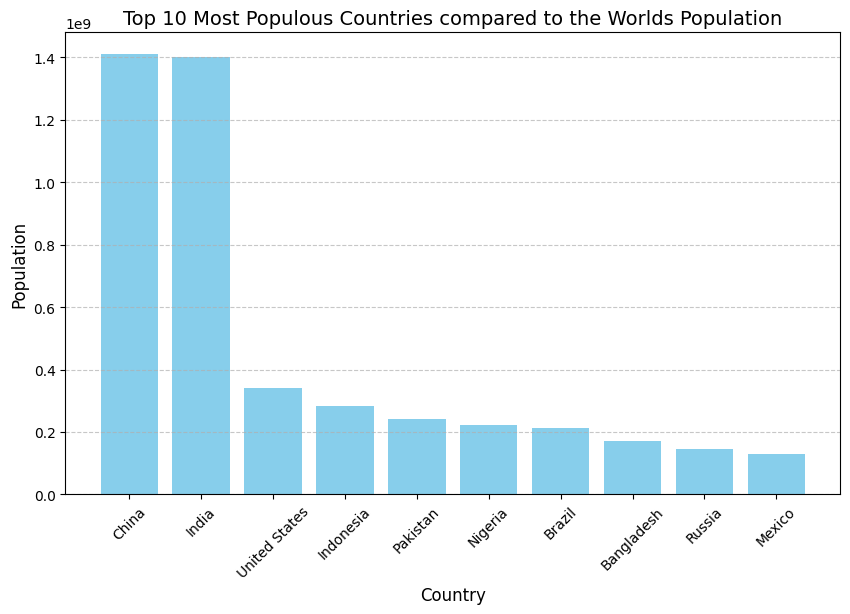

In [17]:
import matplotlib.pyplot as plt

# Select top 10 most populous countries
top10_population = population_table.head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top10_population['Country'], top10_population['Population'], color='skyblue')
plt.title('Top 10 Most Populous Countries compared to the Worlds Population', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [11]:
# Remove "World" from the dataset
population_table = population_table[population_table['Country'] != 'World']

# Display the cleaned dataset to confirm
print(population_table.head())


         Country  Population
1          China  1409670000
2          India  1402737000
3  United States   340110988
4      Indonesia   282477584
5       Pakistan   241499431


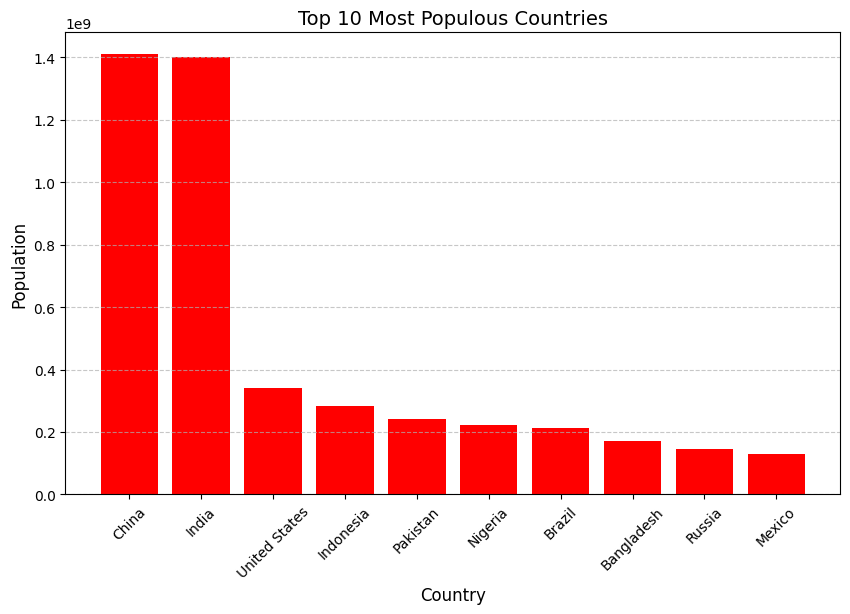

In [16]:
import matplotlib.pyplot as plt

# Select the top 10 most populous countries
top10_population = population_table.head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top10_population['Country'], top10_population['Population'], color='red')
plt.title('Top 10 Most Populous Countries', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
